# PUMA: Promoter Unraveling through Machine-learning Algorithms
<img src="https://raw.githubusercontent.com/CarolusVitalis/PUMA/main/Images/PUMA_Logo.png" alt="PUMA Logo" width="200"/>


### _AI model to identify promoter sequences in existing databases_

### Dependencies

Here, we check if the dependencies are installed, and if they are not, ask the user if they want to install them

In [1]:
import subprocess
import sys

# List of dependencies
dependencies = ["pandas", "scikit-learn", "seaborn", "plotnine"] #, "sbol_utilities"]

# Function to check if a module is installed
def is_module_installed(module_name):
    try:
        __import__(module_name)
        return True
    except ImportError:
        return False

# Function to install a module
def install_module(module_name):
    subprocess.check_call([sys.executable, "-m", "pip", "install", module_name])

# Check each dependency
for module in dependencies:
    if not is_module_installed(module):
        print(f"The module '{module}' is not installed.")
        answer = input(f"Do you want to install '{module}'? (yes/no): ")
        if answer.lower() == "yes":
            install_module(module)
            print(f"'{module}' has been installed.")
        else:
            print(f"'{module}' has not been installed.")
    else:
        print(f"The module '{module}' is already installed.")

The module 'pandas' is already installed.
The module 'scikit-learn' is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 33.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 39.9 MB/s eta 0:00:00a 0:00:01
'scikit-learn' has been installed.
The module 'seaborn' is already installed.
The module 'plotnine' is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 39.1 MB/s eta 0:00:00a 0:00:01
'plotnine' has been installed.


We import the packages we need

In [2]:
import seaborn as sns
import getpass
import requests
import re
# import sbol3
import pandas as pd

### Accessing SynBioHub to retrieve the information
Here we login into SynBioHub to retrieve the promoters' values. We ask the user for their credentials

In [4]:
response = requests.post(
    'https://synbiohub.org/login',
    headers={
        'Accept': 'text/plain'
    },
    data={
        'email': input('SynBioHub email: '),
        'password' : getpass.getpass('Password: '),
        },
)

print(response.status_code)
print(response.content)

200
b'b77b3a87-a48b-4e8a-b6a8-928611a9a2df'


Here we search for all the collections in the database

In [5]:
# response = requests.get(
#     'https://synbiohub.org/rootCollections',
#     headers={
#         'Accept': 'text/plain',
#         'X-authorization': response.content
#         },
# )

# print(response.status_code)
# print(response.content)

200
b'[{"uri":"https://synbiohub.org/public/CnDatabase/CnDatabase_collection/1","name":"Cryptococcus neoformans Database in Synthetic Biology Open Language","description":"This is a collection of Biological Genetic Parts of Cryptococcus neoformans containing 23 different promoters, coding sequences and terminators, which were previously used and whose efficacy has already been proven in this organism. This work was made in order to facilitate the build and assembly of genetic circuits and plasmids for the study of this pathogen.","displayId":"CnDatabase_collection","version":"1"},{"uri":"https://synbiohub.org/public/bsu/bsu_collection/1","name":"Bacillus subtilis Collection","description":"This collection includes information about promoters, operators, CDSs and proteins from Bacillus subtilis. Functional interactions such as transcriptional activation and repression, protein production and various protein-protein interactions are also included.","displayId":"bsu_collection","version":

Here we look for a specific collection

In [9]:
# response = requests.get(
#     'https://synbiohub.org/public/igem/igem_collection/1',
#     headers={
#         'Accept': 'text/plain',
#         'X-authorization': response.content
#         },
# )

# print(response.status_code)
# print(response.content)

KeyboardInterrupt: 

In [7]:
import pandas as pd

# Search for DNA sequences using regular expression
dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', response.content.decode('utf-8'), re.DOTALL)

# Create a pandas dataframe
df = pd.DataFrame(dna_sequences, columns=['Name', 'DNA Sequence'])

# Print the dataframe
print(df)


Empty DataFrame
Columns: [Name, DNA Sequence]
Index: []


### SynBioHub (iGEM Collection)
This version uses local SBOL files from the 2019 iGEM Distribution

In [18]:
promoters_2019 = open('./SBOL_Files/iGEM_2019_Promoters_collection.xml').read()

rbs_2019 = open('./SBOL_Files/iGEM_2019_RBSs_collection.xml').read()

cds_2019 = open('./SBOL_files/iGEM_2019_CDS_collection.xml').read()

t_2019 = open('./SBOL_Files/iGEM_2019_Terminators_collection.xml').read()

print(promoters_2019)

# Search for DNA sequences using regular expression
# Promoters
p19_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', promoters_2019, re.DOTALL)

# Create a pandas dataframe
p19_df = pd.DataFrame(p19_dna_sequences, columns=['Name', 'DNA Sequence'])
print(len(p19_df))
# Print the dataframe
print(p19_df)

# # RBS
# rbs19_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', rbs_2019, re.DOTALL)
# rbs19_df = pd.DataFrame(rbs19_dna_sequences, columns=['Name', 'DNA Sequence'])
# #print(rbs19_df)
# print(len(rbs19_df))

# # CDS
# cds19_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', cds_2019, re.DOTALL)
# cds19_df = pd.DataFrame(cds19_dna_sequences, columns=['Name', 'DNA Sequence'])
# print(len(cds19_df))

# # Terminators
# t19_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', t_2019, re.DOTALL)
# t19_df = pd.DataFrame(t19_dna_sequences, columns=['Name', 'DNA Sequence'])
# print(len(t19_df))

# # why is the first name of the df the name of the collection? 
# # for now, will remove first row so that we have realistic names
# p19_df = p19_df.drop(p19_df.index[0])

# # add in promoter label for these seqs
# p19_df['Element'] = "Promoter"

# rbs19_df = rbs19_df.drop(rbs19_df.index[0])
# rbs19_df['Element'] = "RBS"

# cds19_df = cds19_df.drop(cds19_df.index[0])
# cds19_df['Element'] = "CDS"

# t19_df = t19_df.drop(t19_df.index[0])
# t19_df['Element'] = "Terminator"

<?xml version="1.0" ?>
<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:igem="http://wiki.synbiohub.org/wiki/Terms/igem#" xmlns:sbh="http://wiki.synbiohub.org/wiki/Terms/synbiohub#" xmlns:sbol="http://sbols.org/v2#" xmlns:dcterms="http://purl.org/dc/terms/" xmlns:prov="http://www.w3.org/ns/prov#" xmlns:om="http://www.ontology-of-units-of-measure.org/resource/om-2/" xmlns:dc="http://purl.org/dc/elements/1.1/">
  <sbol:Collection rdf:about="https://synbiohub.org/user/carolusvitalis/iGEM_2019_Promoters/iGEM_2019_Promoters_collection/1">
    <sbol:persistentIdentity rdf:resource="https://synbiohub.org/user/carolusvitalis/iGEM_2019_Promoters/iGEM_2019_Promoters_collection"/>
    <sbol:displayId>iGEM_2019_Promoters_collection</sbol:displayId>
    <sbol:version>1</sbol:version>
    <dcterms:title>iGEM 2019 Distribution Promoters</dcterms:title>
    <dcterms:description>iGEM 2019 Distribution Promoters</dcterms:description>
    <dcterms:created>2024-03-23T18:59:34.492Z</d

Load in target dataset to apply model

In [14]:
promoters_toValidate = open('./SBOL_files/iGEM_Promoters_collection.xml').read()

allPromoters_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', promoters_toValidate, re.DOTALL)

# Create a pandas dataframe
allPromoters_df = pd.DataFrame(allPromoters_dna_sequences, columns=['Name', 'DNA Sequence'])
allPromoters_df = allPromoters_df.drop(allPromoters_df.index[0])
print(len(allPromoters_df))

3175


Concatenate promoter and RBS dataframes for training

In [15]:
pro_rbs_cds_ter_df = pd.concat([p19_df, rbs19_df, cds19_df, t19_df], ignore_index=True)
print(pro_rbs_cds_ter_df)


             Name                                       DNA Sequence  \
0     BBa_K823010                ctgatggctagctcagtcctagggattatgctagc   
1       BBa_R0010  caatacgcaaaccgcctctccccgcgcgttggccgattcattaatg...   
2     BBa_K823005                tttacagctagctcagtcctaggtattatgctagc   
3     BBa_K823012                tttatagctagctcagtcctaggtacaatgctagc   
4     BBa_K733013  aattttgtcaaaataattttattgacaacgtcttattaacgttgat...   
..            ...                                                ...   
778  BBa_K1689018  atgggatccgcggaggatatggctgccgacgaaatgcatcatcatc...   
779   BBa_K801070  tacacaatgtctttacaagaagtcttgagaatgaacggtggtgaag...   
780     BBa_B0013    aaaaaatcaaactggctcaccttcgggtgggcctttttgcgtttata   
781     BBa_B0023    tataaacgcaaaaaggcccacccgaaggtgagccagtttgatttttt   
782     BBa_B0012          tcacactggctcaccttcgggtgggcctttctgcgtttata   

        Element  
0      Promoter  
1      Promoter  
2      Promoter  
3      Promoter  
4      Promoter  
..          ...  
778      

1. Vectorizing sequences into k-mers

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Use CountVectorizer to initialize k-mer splitting 
# using k=4 for first pass
vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 3))

# apply the vectorizer to the concat. dataframe
X = vectorizer.fit_transform(pro_rbs_cds_ter_df['DNA Sequence']).toarray()
y = pro_rbs_cds_ter_df['Element']

2. Splitting training and test set

In [95]:
# these parameters are standard, but we can tweak if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

3. Train the model

In [96]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

4. Validate

In [97]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6683673469387755


5. Apply to full dataset to classify promoters

In [98]:
X_new = vectorizer.transform(allPromoters_df['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_new = model.predict(X_new)

# Add predictions to the new DataFrame
allPromoters_df['PredictedType'] = predictions_new

# Filter to identify sequences predicted as promoters
valid_promoters_df = allPromoters_df[allPromoters_df['PredictedType'] == 'Promoter']
print(len(allPromoters_df))
print(len(valid_promoters_df))

# Filter to identify sequences predicted as non-promoters
non_promoters_df = allPromoters_df[allPromoters_df['PredictedType'] != 'Promoter']
print(len(non_promoters_df))
print(non_promoters_df)



3175
1483
1692
              Name                                       DNA Sequence  \
1       BBa_J05209  taacaccgtgcgtgttgactattttacctctggcggtgataatggttgc   
3     BBa_K1773016  acctgtaggatcgtacaggtttacgcaagaaaatggtttgttatag...   
8        BBa_B1002                 cgcaaaaaaccccgcttcggcggggttttttcgc   
11       BBa_R2109  tttatcaaaaagagtgttgatcccacgcgtgggatataggatactt...   
12    BBa_K2055010                                tgtaataagactcattcgt   
...            ...                                                ...   
3169  BBa_K1614000                                 taatacgactcactatag   
3171     BBa_R2108  tttatcaaaaagagtgttgacatttttaagtcccacgcgtgggatt...   
3173   BBa_K879037                      ttgatattgtgagcggataacaagatatc   
3174    BBa_I15008  atgagtgtcaacttagcttcccagttgcgggaagggacgaaaaaat...   
3175  BBa_K1387002  atgtccagattagataaaagtaaagtgattaacagcgcattagagc...   

     PredictedType  
1              RBS  
3              RBS  
8              RBS  
11             RBS  
12 

In [99]:
training_nolabels = pro_rbs_cds_ter_df.drop('Element', axis=1)

X_old = vectorizer.transform(training_nolabels['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_old = model.predict(X_old)

# Add predictions to the new DataFrame
training_nolabels['PredictedType'] = predictions_old

# Filter to identify sequences predicted as promoters
valid_promoters_old_df = training_nolabels[training_nolabels['PredictedType'] == 'Promoter']
print(len(pro_rbs_cds_ter_df))
print(len(valid_promoters_old_df))

# Filter to identify sequences predicted as non-promoters
non_promoters_df = training_nolabels[training_nolabels['PredictedType'] != 'Promoter']
print(len(non_promoters_df))
print(non_promoters_df)


783
207
576
             Name                                       DNA Sequence  \
0     BBa_K823010                ctgatggctagctcagtcctagggattatgctagc   
2     BBa_K823005                tttacagctagctcagtcctaggtattatgctagc   
3     BBa_K823012                tttatagctagctcagtcctaggtacaatgctagc   
5      BBa_J23108                ctgacagctagctcagtcctaggtataatgctagc   
9     BBa_K823014                ttgacggctagctcagtcctaggtattgtgctagc   
..            ...                                                ...   
778  BBa_K1689018  atgggatccgcggaggatatggctgccgacgaaatgcatcatcatc...   
779   BBa_K801070  tacacaatgtctttacaagaagtcttgagaatgaacggtggtgaag...   
780     BBa_B0013    aaaaaatcaaactggctcaccttcgggtgggcctttttgcgtttata   
781     BBa_B0023    tataaacgcaaaaaggcccacccgaaggtgagccagtttgatttttt   
782     BBa_B0012          tcacactggctcaccttcgggtgggcctttctgcgtttata   

    PredictedType  
0             RBS  
2             RBS  
3             RBS  
5             RBS  
9             RBS  
.. 

### SynBioHub (iGEM Collection) + RegulonDB
This version uses both local SBOL files from the 2019 iGEM Distribution, and files from the RegulonDB.

In [100]:
import pandas as pd

pro_df = pd.read_csv('./RegulonDB_Files/promoters_Data.csv')
ter_df = pd.read_csv('./RegulonDB_Files/terminators_Data.csv')

print(pro_df)
print(ter_df)

pro_df = pro_df.drop(pro_df.index[0])
ter_df = ter_df.drop(ter_df.index[0])

pro_df['Element'] = "Promoter"
ter_df['Element'] = "Terminator"

print(pro_df)
print(ter_df)

promoters_2019 = open('./SBOL_Files/iGEM_2019_Promoters_collection.xml').read()

rbs_2019 = open('./SBOL_Files/iGEM_2019_RBSs_collection.xml').read()

cds_2019 = open('./SBOL_Files/iGEM_2019_CDS_collection.xml').read()

t_2019 = open('./SBOL_Files/iGEM_2019_Terminators_collection.xml').read()


# Search for DNA sequences using regular expression
# Promoters
p19_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', promoters_2019, re.DOTALL)

# Create a pandas dataframe
p19_df = pd.DataFrame(p19_dna_sequences, columns=['Name', 'DNA Sequence'])
print(len(p19_df))
# Print the dataframe
#print(p19_df)

# RBS
rbs19_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', rbs_2019, re.DOTALL)
rbs19_df = pd.DataFrame(rbs19_dna_sequences, columns=['Name', 'DNA Sequence'])
#print(rbs19_df)
print(len(rbs19_df))

# CDS
cds19_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', cds_2019, re.DOTALL)
cds19_df = pd.DataFrame(cds19_dna_sequences, columns=['Name', 'DNA Sequence'])
print(len(cds19_df))

# Terminators
t19_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', t_2019, re.DOTALL)
t19_df = pd.DataFrame(t19_dna_sequences, columns=['Name', 'DNA Sequence'])
print(len(t19_df))

# why is the first name of the df the name of the collection? 
# for now, will remove first row so that we have realistic names
p19_df = p19_df.drop(p19_df.index[0])

# add in promoter label for these seqs
p19_df['Element'] = "Promoter"

rbs19_df = rbs19_df.drop(rbs19_df.index[0])
rbs19_df['Element'] = "RBS"

cds19_df = cds19_df.drop(cds19_df.index[0])
cds19_df['Element'] = "CDS"

t19_df = t19_df.drop(t19_df.index[0])
t19_df['Element'] = "Terminator"

                  Name                                       DNA Sequence
0     RDBECOLIPMC00001  acactttcattgttttaccgttgctctgattaattgacgctaaagt...
1     RDBECOLIPMC00002  ccgatgatcctcatcgtaatccaaccgaaactttacctgattctgg...
2     RDBECOLIPMC00003  gccgttacactcaaaggcggcgcggtgggaacgatatttcacagta...
3     RDBECOLIPMC00004  aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...
4     RDBECOLIPMC00005  tgccaactggcaggtcaaccgaatgcagacatcgcaggcgggatgt...
...                ...                                                ...
4045  RDBECOLIPMC04049  gcgatcctcatcagccgcattgcggccaacttctggattagcgcca...
4046  RDBECOLIPMC04050  ttgaatcgtctgtccaaccgctgttttacgcagcgcttgtgcatcg...
4047  RDBECOLIPMC04051  accgccgccgccgccgacgccgatgactttaatcaccgcgtcattg...
4048  RDBECOLIPMC04052  aggacaacagctggacgatgtccagcttgctcgctaccttttgtcg...
4049  RDBECOLIPMC04053  gcttaacaattttgcaaaatgtattggcgagtaagaaccgcatttg...

[4050 rows x 2 columns]
                 Name                                       DNA Sequence
0    RDBECOLIT

In [101]:
pro_ter_df = pd.concat([pro_df, p19_df, rbs19_df, cds19_df, t19_df, ter_df], ignore_index=True)
pro_ter_df = pro_ter_df.dropna(subset=['DNA Sequence'])
print(pro_ter_df)

                  Name                                       DNA Sequence  \
0     RDBECOLIPMC00002  ccgatgatcctcatcgtaatccaaccgaaactttacctgattctgg...   
1     RDBECOLIPMC00003  gccgttacactcaaaggcggcgcggtgggaacgatatttcacagta...   
2     RDBECOLIPMC00004  aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...   
3     RDBECOLIPMC00005  tgccaactggcaggtcaaccgaatgcagacatcgcaggcgggatgt...   
4     RDBECOLIPMC00006  tttgttgcgatttagcgcgcaaatctttacttatttacagaacttc...   
...                ...                                                ...   
5197  RDBECOLITMC00367        aaaaggattcgcggctctgctcttcagagctgcttttatgata   
5198  RDBECOLITMC00368           gttattaaatagcctgccatctggcaggctttttttatcg   
5199  RDBECOLITMC00369       atgcaggaaagcaggctggagctacccagcctgcagtgaaatta   
5200  RDBECOLITMC00370     tgaaaacgaaggccggagcatgctccggccttttttatctcttaca   
5201  RDBECOLITMC00371               ctgcccttttccctgctcctggacggttttacccct   

         Element  
0       Promoter  
1       Promoter  
2       Promoter  

In [ ]:
'''
import os

output_dir = "./csv"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "pro_ter.csv")
pro_ter_df.to_csv(file_path, index=False)
print(f"Exported DataFrame as CSV: {file_path}")
'''

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Ask the user for the size of the k-mers
k_mer_size = int(input("Enter the size of the k-mers: "))

# Use CountVectorizer to initialize k-mer splitting 
# Use the user's input as the ngram_range parameter
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k_mer_size, k_mer_size))

# apply the vectorizer to the concat. dataframe
X = vectorizer.fit_transform(pro_ter_df['DNA Sequence']).toarray()
y = pro_ter_df['Element']

In [ ]:
# these parameters are standard, but we can tweak if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
modelGaussian = GaussianNB()
modelGaussian.fit(X_train, y_train)

In [ ]:
predictions = modelGaussian.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


In [ ]:
X_new = vectorizer.transform(p19_df['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_new = modelGaussian.predict(X_new)

# Add predictions to the new DataFrame
p19_df['PredictedType'] = predictions_new

# Filter to identify sequences predicted as promoters
valid_promoters_df = p19_df[p19_df['PredictedType'] == 'Promoter']
print(len(p19_df))
print(len(valid_promoters_df))
print("Valid Promoters")
print(valid_promoters_df)

print("Non-Promoters")
# Filter to identify sequences predicted as non-promoters
non_promoters_df = p19_df[p19_df['PredictedType'] != 'Promoter']
print(len(non_promoters_df))
print(non_promoters_df)




In [ ]:
training_nolabels = pro_ter_df.drop('Element', axis=1)

X_old = vectorizer.transform(training_nolabels['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_old = modelGaussian.predict(X_old)

# Add predictions to the new DataFrame
training_nolabels['PredictedType'] = predictions_old

# Filter to identify sequences predicted as promoters
valid_promoters_old_df = training_nolabels[training_nolabels['PredictedType'] == 'Promoter']
print(len(pro_ter_df))
print(len(valid_promoters_old_df))

In [ ]:
training_nolabels = pro_df.drop('Element', axis=1)
training_nolabels = training_nolabels.dropna(subset=['DNA Sequence'])


X_old = vectorizer.transform(training_nolabels['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_old = modelGaussian.predict(X_old)

# Add predictions to the new DataFrame
training_nolabels['PredictedType'] = predictions_old

# Filter to identify sequences predicted as promoters
valid_promoters_old_df = training_nolabels[training_nolabels['PredictedType'] == 'Promoter']
print(len(pro_df))
print(len(valid_promoters_old_df))

### iGEM Repository + RegulonDB Gaussian
This version uses local csv files from the iGEM Repository and the RegulonDB.

In [17]:
import pandas as pd

#RegulonDB Files
pro_df = pd.read_csv('./RegulonDB_Files/promoters_Data.csv')
ter_df = pd.read_csv('./RegulonDB_Files/terminators_Data.csv')
gen_df = pd.read_csv('./RegulonDB_Files/genes_Data.csv')

print(pro_df)
print(ter_df)
print(gen_df)

# pro_df = pro_df.drop(pro_df.index[0])
# ter_df = ter_df.drop(ter_df.index[0])

pro_df['Element'] = "Promoter"
ter_df['Element'] = "Terminator"
gen_df['Element'] = "Gene"

print(pro_df)
print(ter_df)
print(gen_df)

#iGEM Repository Files
pro_2023 = pd.read_csv('./csv/Promoter_Part_Sequences.csv')
rbs_2023 = pd.read_csv('./csv/RBS_Part_Sequences.csv')
cds_2023 = pd.read_csv('./csv/CDS_Part_Sequences.csv')
ter_2023 = pd.read_csv('./csv/Terminator_Part_Sequences.csv')
bkb_2023 = pd.read_csv('./csv/Backbone_Part_Sequences.csv')

print(pro_2023)
print(rbs_2023)
print(cds_2023)
print(ter_2023)
print(bkb_2023)

# pro_2023 = pro_2023.drop(pro_2023.index[0])
# rbs_2023 = rbs_2023.drop(rbs_2023.index[0])
# cds_2023 = cds_2023.drop(cds_2023.index[0])
# ter_2023 = ter_2023.drop(ter_2023.index[0])
# bkb_2023 = bkb_2023.drop(bkb_2023.index[0])

pro_2023['Element'] = "Promoter"
rbs_2023['Element'] = "RBS"
cds_2023['Element'] = "CDS"
ter_2023['Element'] = "Terminator"
bkb_2023['Element'] = "Backbone"

                  Name                                       DNA Sequence
0     RDBECOLIPMC00001  acactttcattgttttaccgttgctctgattaattgacgctaaagt...
1     RDBECOLIPMC00002  ccgatgatcctcatcgtaatccaaccgaaactttacctgattctgg...
2     RDBECOLIPMC00003  gccgttacactcaaaggcggcgcggtgggaacgatatttcacagta...
3     RDBECOLIPMC00004  aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...
4     RDBECOLIPMC00005  tgccaactggcaggtcaaccgaatgcagacatcgcaggcgggatgt...
...                ...                                                ...
4045  RDBECOLIPMC04049  gcgatcctcatcagccgcattgcggccaacttctggattagcgcca...
4046  RDBECOLIPMC04050  ttgaatcgtctgtccaaccgctgttttacgcagcgcttgtgcatcg...
4047  RDBECOLIPMC04051  accgccgccgccgccgacgccgatgactttaatcaccgcgtcattg...
4048  RDBECOLIPMC04052  aggacaacagctggacgatgtccagcttgctcgctaccttttgtcg...
4049  RDBECOLIPMC04053  gcttaacaattttgcaaaatgtattggcgagtaagaaccgcatttg...

[4050 rows x 2 columns]
                 Name                                       DNA Sequence
0    RDBECOLIT

In [18]:
all_parts_df = pd.concat([pro_df, ter_df, pro_2023, rbs_2023, cds_2023, ter_2023, bkb_2023], ignore_index=True)
all_parts_df = all_parts_df.dropna(subset=['DNA Sequence'])
print(all_parts_df)

                  Name                                       DNA Sequence  \
0     RDBECOLIPMC00001  acactttcattgttttaccgttgctctgattaattgacgctaaagt...   
1     RDBECOLIPMC00002  ccgatgatcctcatcgtaatccaaccgaaactttacctgattctgg...   
2     RDBECOLIPMC00003  gccgttacactcaaaggcggcgcggtgggaacgatatttcacagta...   
3     RDBECOLIPMC00004  aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...   
4     RDBECOLIPMC00005  tgccaactggcaggtcaaccgaatgcagacatcgcaggcgggatgt...   
...                ...                                                ...   
4729        BBa_J04450  caatacgcaaaccgcctctccccgcgcgttggccgattcattaatg...   
4730       BBa_J435281  gcaacgagaccggagtagtcttcgaaagtgaaacgtgatttcatgc...   
4731       BBa_J428330  tgagaccggagttgacggctagctcagtcctaggtacagtgctagc...   
4732       BBa_J435300  cgagaccattgacagcgcagctggcacgacaggtttcccgactgga...   
4733       BBa_J435320  cgagaccattgacagcgcagctggcacgacaggtttcccgactgga...   

       Element  
0     Promoter  
1     Promoter  
2     Promoter  
3     P

In [19]:
'''
import os

output_dir = "./csv"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "all_parts.csv")
all_parts_df.to_csv(file_path, index=False)
print(f"Exported DataFrame as CSV: {file_path}")
'''

'\nimport os\n\noutput_dir = "./csv"\nif not os.path.exists(output_dir):\n    os.makedirs(output_dir)\n\nfile_path = os.path.join(output_dir, "all_parts.csv")\nall_parts_df.to_csv(file_path, index=False)\nprint(f"Exported DataFrame as CSV: {file_path}")\n'

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

# Ask the user for the size of the k-mers
k_mer_size = int(input("Enter the size of the k-mers: "))

# Use CountVectorizer to initialize k-mer splitting 
# Use the user's input as the ngram_range parameter
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k_mer_size, k_mer_size))

# apply the vectorizer to the concat. dataframe
X = vectorizer.fit_transform(all_parts_df['DNA Sequence']).toarray()
y = all_parts_df['Element']

In [21]:
# these parameters are standard, but we can tweak if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
modelGaussian = GaussianNB()
modelGaussian.fit(X_train, y_train)

GaussianNB()

In [23]:
predictions = modelGaussian.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9214527027027027


In [24]:
X_new = vectorizer.transform(pro_2023['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_new = modelGaussian.predict(X_new)

# Add predictions to the new DataFrame
pro_2023['PredictedType'] = predictions_new

# Filter to identify sequences predicted as promoters
valid_promoters_df = pro_2023[pro_2023['PredictedType'] == 'Promoter']
print(len(pro_2023))
print(len(valid_promoters_df))
print("Valid Promoters")
print(valid_promoters_df)

print("Non-Promoters")
# Filter to identify sequences predicted as non-promoters
non_promoters_df = pro_2023[pro_2023['PredictedType'] != 'Promoter']
print(len(non_promoters_df))
print(non_promoters_df)
print(non_promoters_df[['Name', 'PredictedType']])

77
46
Valid Promoters
            Name                                       DNA Sequence   Element  \
0    BBa_J428006   ttcgttaccaattgacagctagctatcataccgctataatggtatgtt  Promoter   
1    BBa_J428001  cttgtccaaccaaatgattcgttaccaattgacagtttctatcgat...  Promoter   
2     BBa_J23100                ttgacggctagctcagtcctaggtacagtgctagc  Promoter   
6   BBa_K3317006  attggatccaattgacagctagctcagtcctaggtaccattggatc...  Promoter   
7    BBa_J428042  gtcaactcataagattctgattcgttaccaattgacaattcaccta...  Promoter   
8    BBa_J428041  aattgtgagcggataacaattgacattgtgagcggataacaagata...  Promoter   
10    BBa_J23107                tttacggctagctcagccctaggtattatgctagc  Promoter   
11  BBa_K3317007  ttttgttcgattatcgaacaaattattgaaatatcgaacaaaacct...  Promoter   
12    BBa_J23106                tttacggctagctcagtcctaggtatagtgctagc  Promoter   
13   BBa_J428040  cacccagcagtatttacaaacaaccatgaatgtaagtatattcctt...  Promoter   
16    BBa_J23114                tttatggctagctcagtcctaggtacaatgctagc  Promoter   
17    

4734
3896
Valid Promoters
                  Name                                       DNA Sequence  \
0     RDBECOLIPMC00001  acactttcattgttttaccgttgctctgattaattgacgctaaagt...   
1     RDBECOLIPMC00002  ccgatgatcctcatcgtaatccaaccgaaactttacctgattctgg...   
2     RDBECOLIPMC00003  gccgttacactcaaaggcggcgcggtgggaacgatatttcacagta...   
3     RDBECOLIPMC00004  aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...   
4     RDBECOLIPMC00005  tgccaactggcaggtcaaccgaatgcagacatcgcaggcgggatgt...   
...                ...                                                ...   
4715       BBa_J435231  tcaagaggatgtcagaatgccatttgcctgagagatgcaggcttca...   
4718       BBa_J435228  agcttttgattaagccttctagtccaaaaaacacgtttttttgtca...   
4719       BBa_J435263  gccaattggtgcggcaattgataataacgaaaatgtcttttaatga...   
4722       BBa_J435275  acagatgacgggagacactagcacacaactttaccaggcaaggtat...   
4723       BBa_J435274  atgtgcttttgtttatttcctatttggttattcacacatattttct...   

     PredictedType  
0         Promoter  
1      

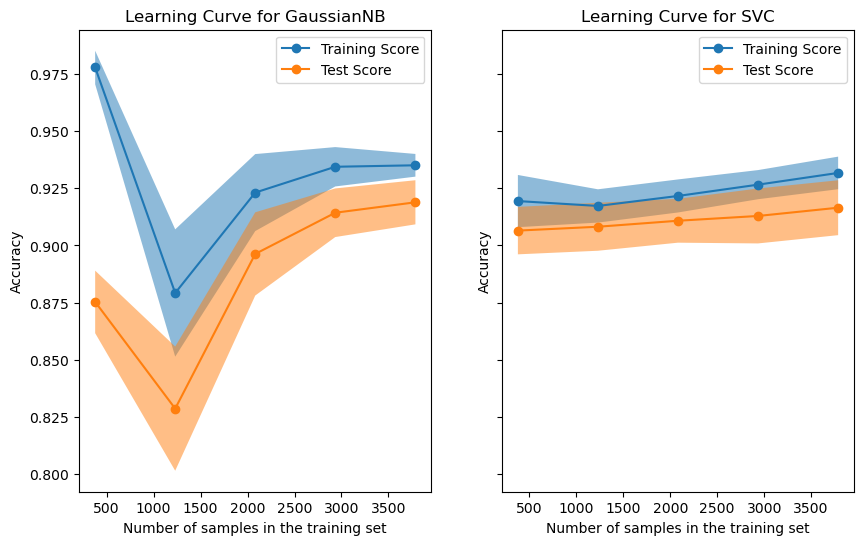

In [25]:
training_nolabels = all_parts_df.drop('Element', axis=1)

X_old = vectorizer.transform(training_nolabels['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_old = modelGaussian.predict(X_old)

# Add predictions to the new DataFrame
training_nolabels['PredictedType'] = predictions_old

# Filter to identify sequences predicted as promoters
valid_promoters_old_df = training_nolabels[training_nolabels['PredictedType'] == 'Promoter']
print(len(all_parts_df))
print(len(valid_promoters_old_df))
print("Valid Promoters")
print(valid_promoters_old_df)

print("Non-Promoters")
# Filter to identify sequences predicted as non-promoters
non_promoters_old_df = training_nolabels[training_nolabels['PredictedType'] != 'Promoter']
print(len(non_promoters_old_df))
print(non_promoters_old_df)

import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([modelGaussian, modelSVC]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
igem_pro_file = open('./SBOL_Files/iGEM_Promoters_collection.xml').read()

# Search for DNA sequences using regular expression
igem_pro_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', igem_pro_file, re.DOTALL)

# Create a pandas dataframe
igem_pro_df = pd.DataFrame(igem_pro_dna_sequences, columns=['Name', 'DNA Sequence'])
print(len(igem_pro_df))
# Print the dataframe
#print(igem_pro_df)

# why is the first name of the df the name of the collection? 
# for now, will remove first row so that we have realistic names
igem_pro_df = igem_pro_df.drop(igem_pro_df.index[0])

# add in promoter label for these seqs
igem_pro_df['Element'] = "Promoter"

In [ ]:
igem_pro_nolabels = igem_pro_df.drop('Element', axis=1)
igem_pro_nolabels = igem_pro_nolabels.dropna(subset=['DNA Sequence'])


X_old = vectorizer.transform(igem_pro_nolabels['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_old = model.predict(X_old)

# Add predictions to the new DataFrame
igem_pro_nolabels['PredictedType'] = predictions_old

# Filter to identify sequences predicted as promoters
valid_igem_promoters_df = igem_pro_nolabels[igem_pro_nolabels['PredictedType'] == 'Promoter']
print(len(igem_pro_df))
print(len(valid_igem_promoters_df))
print("Valid Promoters")
print(valid_igem_promoters_df)

print("Non-Promoters")
# Filter to identify sequences predicted as non-promoters
non_promoters_igem_df = igem_pro_nolabels[igem_pro_nolabels['PredictedType'] != 'Promoter']
print(len(non_promoters_igem_df))
print(non_promoters_igem_df)

In [ ]:
import os

output_dir = "./csv"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "igem_non_promoters.csv")
non_promoters_igem_df.to_csv(file_path, index=False)
print(f"Exported DataFrame as CSV: {file_path}")

### iGEM Repository + RegulonDB SVC
This version uses local csv files from the iGEM Repository and the RegulonDB.

In [ ]:
import pandas as pd

#RegulonDB Files
pro_df = pd.read_csv('./RegulonDB_Files/promoters_Data.csv')
ter_df = pd.read_csv('./RegulonDB_Files/terminators_Data.csv')
gen_df = pd.read_csv('./RegulonDB_Files/genes_Data.csv')

print(pro_df)
print(ter_df)
print(gen_df)

# pro_df = pro_df.drop(pro_df.index[0])
# ter_df = ter_df.drop(ter_df.index[0])

pro_df['Element'] = "Promoter"
ter_df['Element'] = "Terminator"
gen_df['Element'] = "Gene"

print(pro_df)
print(ter_df)
print(gen_df)

#iGEM Repository Files
pro_2023 = pd.read_csv('./csv/Promoter_Part_Sequences.csv')
rbs_2023 = pd.read_csv('./csv/RBS_Part_Sequences.csv')
cds_2023 = pd.read_csv('./csv/CDS_Part_Sequences.csv')
ter_2023 = pd.read_csv('./csv/Terminator_Part_Sequences.csv')
bkb_2023 = pd.read_csv('./csv/Backbone_Part_Sequences.csv')

print(pro_2023)
print(rbs_2023)
print(cds_2023)
print(ter_2023)
print(bkb_2023)

# pro_2023 = pro_2023.drop(pro_2023.index[0])
# rbs_2023 = rbs_2023.drop(rbs_2023.index[0])
# cds_2023 = cds_2023.drop(cds_2023.index[0])
# ter_2023 = ter_2023.drop(ter_2023.index[0])
# bkb_2023 = bkb_2023.drop(bkb_2023.index[0])

pro_2023['Element'] = "Promoter"
rbs_2023['Element'] = "RBS"
cds_2023['Element'] = "CDS"
ter_2023['Element'] = "Terminator"
bkb_2023['Element'] = "Backbone"

                  Name                                       DNA Sequence
0     RDBECOLIPMC00001  acactttcattgttttaccgttgctctgattaattgacgctaaagt...
1     RDBECOLIPMC00002  ccgatgatcctcatcgtaatccaaccgaaactttacctgattctgg...
2     RDBECOLIPMC00003  gccgttacactcaaaggcggcgcggtgggaacgatatttcacagta...
3     RDBECOLIPMC00004  aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...
4     RDBECOLIPMC00005  tgccaactggcaggtcaaccgaatgcagacatcgcaggcgggatgt...
...                ...                                                ...
4045  RDBECOLIPMC04049  gcgatcctcatcagccgcattgcggccaacttctggattagcgcca...
4046  RDBECOLIPMC04050  ttgaatcgtctgtccaaccgctgttttacgcagcgcttgtgcatcg...
4047  RDBECOLIPMC04051  accgccgccgccgccgacgccgatgactttaatcaccgcgtcattg...
4048  RDBECOLIPMC04052  aggacaacagctggacgatgtccagcttgctcgctaccttttgtcg...
4049  RDBECOLIPMC04053  gcttaacaattttgcaaaatgtattggcgagtaagaaccgcatttg...

[4050 rows x 2 columns]
                 Name                                       DNA Sequence
0    RDBECOLIT

In [ ]:
all_parts_df = pd.concat([pro_df, ter_df, pro_2023, rbs_2023, cds_2023, ter_2023, bkb_2023], ignore_index=True)
all_parts_df = all_parts_df.dropna(subset=['DNA Sequence'])
print(all_parts_df)

                  Name                                       DNA Sequence  \
0     RDBECOLIPMC00001  acactttcattgttttaccgttgctctgattaattgacgctaaagt...   
1     RDBECOLIPMC00002  ccgatgatcctcatcgtaatccaaccgaaactttacctgattctgg...   
2     RDBECOLIPMC00003  gccgttacactcaaaggcggcgcggtgggaacgatatttcacagta...   
3     RDBECOLIPMC00004  aaatacttatggtgcgctggcttctttggaacttgcgcagcaattt...   
4     RDBECOLIPMC00005  tgccaactggcaggtcaaccgaatgcagacatcgcaggcgggatgt...   
...                ...                                                ...   
4729        BBa_J04450  caatacgcaaaccgcctctccccgcgcgttggccgattcattaatg...   
4730       BBa_J435281  gcaacgagaccggagtagtcttcgaaagtgaaacgtgatttcatgc...   
4731       BBa_J428330  tgagaccggagttgacggctagctcagtcctaggtacagtgctagc...   
4732       BBa_J435300  cgagaccattgacagcgcagctggcacgacaggtttcccgactgga...   
4733       BBa_J435320  cgagaccattgacagcgcagctggcacgacaggtttcccgactgga...   

       Element  
0     Promoter  
1     Promoter  
2     Promoter  
3     P

In [ ]:
'''
import os

output_dir = "./csv"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "all_parts.csv")
all_parts_df.to_csv(file_path, index=False)
print(f"Exported DataFrame as CSV: {file_path}")
'''

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

# Ask the user for the size of the k-mers
k_mer_size = int(input("Enter the size of the k-mers: "))

# Use CountVectorizer to initialize k-mer splitting 
# Use the user's input as the ngram_range parameter
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k_mer_size, k_mer_size))

# apply the vectorizer to the concat. dataframe
X = vectorizer.fit_transform(all_parts_df['DNA Sequence']).toarray()
y = all_parts_df['Element']

In [ ]:
# these parameters are standard, but we can tweak if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
modelSVC = svm.SVC()
modelSVC.fit(X_train, y_train)

In [ ]:
predictions = modelSVC.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


In [ ]:
X_new = vectorizer.transform(pro_2023['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_new = modelSVC.predict(X_new)

# Add predictions to the new DataFrame
pro_2023['PredictedType'] = predictions_new

# Filter to identify sequences predicted as promoters
valid_promoters_df = pro_2023[pro_2023['PredictedType'] == 'Promoter']
print(len(pro_2023))
print(len(valid_promoters_df))
print("Valid Promoters")
print(valid_promoters_df)

print("Non-Promoters")
# Filter to identify sequences predicted as non-promoters
non_promoters_df = pro_2023[pro_2023['PredictedType'] != 'Promoter']
print(len(non_promoters_df))
print(non_promoters_df)
print(non_promoters_df[['Name', 'PredictedType']])

In [ ]:
training_nolabels = all_parts_df.drop('Element', axis=1)

X_old = vectorizer.transform(training_nolabels['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_old = modelSVC.predict(X_old)

# Add predictions to the new DataFrame
training_nolabels['PredictedType'] = predictions_old

# Filter to identify sequences predicted as promoters
valid_promoters_old_df = training_nolabels[training_nolabels['PredictedType'] == 'Promoter']
print(len(all_parts_df))
print(len(valid_promoters_old_df))
print("Valid Promoters")
print(valid_promoters_old_df)

print("Non-Promoters")
# Filter to identify sequences predicted as non-promoters
non_promoters_old_df = training_nolabels[training_nolabels['PredictedType'] != 'Promoter']
print(len(non_promoters_old_df))
print(non_promoters_old_df)

import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([modelGaussian, modelSVC]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
igem_pro_file = open('./SBOL_Files/iGEM_Promoters_collection.xml').read()

# Search for DNA sequences using regular expression
igem_pro_dna_sequences = re.findall(r'<sbol:displayId>(.*?)_sequence</sbol:displayId>.*?<sbol:elements>(.*?)</sbol:elements>', igem_pro_file, re.DOTALL)

# Create a pandas dataframe
igem_pro_df = pd.DataFrame(igem_pro_dna_sequences, columns=['Name', 'DNA Sequence'])
print(len(igem_pro_df))
# Print the dataframe
#print(igem_pro_df)

# why is the first name of the df the name of the collection? 
# for now, will remove first row so that we have realistic names
igem_pro_df = igem_pro_df.drop(igem_pro_df.index[0])

# add in promoter label for these seqs
igem_pro_df['Element'] = "Promoter"

In [ ]:
igem_pro_nolabels = igem_pro_df.drop('Element', axis=1)
igem_pro_nolabels = igem_pro_nolabels.dropna(subset=['DNA Sequence'])


X_old = vectorizer.transform(igem_pro_nolabels['DNA Sequence']).toarray()

# Use the trained model to predict the sequence types
predictions_old = model.predict(X_old)

# Add predictions to the new DataFrame
igem_pro_nolabels['PredictedType'] = predictions_old

# Filter to identify sequences predicted as promoters
valid_igem_promoters_df = igem_pro_nolabels[igem_pro_nolabels['PredictedType'] == 'Promoter']
print(len(igem_pro_df))
print(len(valid_igem_promoters_df))
print("Valid Promoters")
print(valid_igem_promoters_df)

print("Non-Promoters")
# Filter to identify sequences predicted as non-promoters
non_promoters_igem_df = igem_pro_nolabels[igem_pro_nolabels['PredictedType'] != 'Promoter']
print(len(non_promoters_igem_df))
print(non_promoters_igem_df)

In [ ]:
import os

output_dir = "./csv"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_path = os.path.join(output_dir, "igem_non_promoters.csv")
non_promoters_igem_df.to_csv(file_path, index=False)
print(f"Exported DataFrame as CSV: {file_path}")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

all_parts_df


# Ask the user for the size of the k-mers
k_mer_size = int(input("Enter the size of the k-mers: "))

# Use CountVectorizer to initialize k-mer splitting 
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k_mer_size, k_mer_size))

# Setup the SVM classifier
svm_model = SVC(kernel='linear')

# Create a pipeline that incorporates the vectorizer and SVM
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', svm_model)
])

# Parameters for Grid Search
param_grid = {'classifier__C': [0.1, 1, 10, 100], 'classifier__kernel': ['linear', 'rbf']}

# Setup nested cross-validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Inner CV - hyperparameter tuning
clf = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=inner_cv)

# Outer CV - model evaluation
nested_score = cross_val_score(clf, X=all_parts_df['DNA Sequence'], y=all_parts_df['Element'], cv=outer_cv)

print("Nested CV Accuracy: {:.2f} +/- {:.2f}".format(nested_score.mean(), nested_score.std()))


Nested CV Accuracy: 0.93 +/- 0.01


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from collections import Counter

all_parts_df
print(all_parts_df.shape[0])
print(all_parts_df.columns)
# User input for k-mer size
k_mer_size = int(input("Enter the size of the k-mers: "))

# Setup the CountVectorizer for k-mer splitting
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k_mer_size, k_mer_size))

# Setup the SVM classifier
svm_model = SVC(kernel='linear')

# Create a pipeline with the vectorizer and SVM
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', svm_model)
])

# Parameters for Grid Search
param_grid = {'classifier__C': [.1, 1, 10, 100], 'classifier__kernel': ['linear', 'rbf']}

# Setup cross-validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store results
best_params = []
accuracy_scores = []

for train_idx, test_idx in outer_cv.split(all_parts_df):
    X_train, X_test = all_parts_df.iloc[train_idx]['DNA Sequence'], all_parts_df.iloc[test_idx]['DNA Sequence']
    y_train, y_test = all_parts_df.iloc[train_idx]['Element'], all_parts_df.iloc[test_idx]['Element']
    
    # Inner CV - hyperparameter tuning
    clf = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)  # Inner cross-validation
    clf.fit(X_train, y_train)
    
    # Storing best parameters
    best_params.append(clf.best_params_)
    
    # Evaluate the classifier on the test set using the best found parameters
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the best parameters and accuracy for each outer fold
print("Best parameters and accuracy for each fold:")
for idx, (params, acc) in enumerate(zip(best_params, accuracy_scores)):
    print(f"Fold {idx+1}: Best Params: {params}, Accuracy: {acc:.4f}")

# Determine the most common best parameters
param_counts = Counter([frozenset(param.items()) for param in best_params])
most_common_params = param_counts.most_common(1)[0][0]
optimal_params = {k: v for k, v in most_common_params}

# Print the most common best parameters
print("Most common best parameters across all folds:", optimal_params)




4734
Index(['Name', 'DNA Sequence', 'Element'], dtype='object')
Best parameters and accuracy for each fold:
Fold 1: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9241
Fold 2: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9219
Fold 3: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9473
Fold 4: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9473
Fold 5: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9323
Fold 6: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9302
Fold 7: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9345
Fold 8: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9239
Fold 9: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy: 0.9366
Fold 10: Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}, Accuracy

In [ ]:
# Assuming best_params is a list of dictionaries obtained from GridSearchCV
from collections import Counter

# Calculate the most common best parameters
param_counts = Counter(tuple(sorted(d.items())) for d in best_params)
most_common_params, _ = param_counts.most_common(1)[0]

# Convert to dictionary and remove 'classifier__' prefix from keys
optimal_params = {k.split('__')[1]: v for k, v in most_common_params}

# Now you can create your final model with these parameters
final_model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(k_mer_size, k_mer_size))),
    ('classifier', SVC(C=optimal_params['C'], kernel=optimal_params['kernel']))
])

# Train the final model with the full dataset
final_model.fit(all_parts_df['DNA Sequence'], all_parts_df['Element'])


# Now the final model is ready to make predictions on new data
all_promoters_good = pd.read_csv('./csv/All_Promoters_Part_Sequences.csv')

X_new = all_promoters_good['DNA Sequence']

# Use the trained model to predict the sequence types
predictions_new = final_model.predict(X_new)


# Add predictions to the new DataFrame
all_promoters_good['PredictedType'] = predictions_new

# Filter to identify sequences predicted as promoters
valid_promoters_df = all_promoters_good[all_promoters_good['PredictedType'] == 'Promoter']
print(len(all_promoters_good))
print(len(valid_promoters_df))
print("Valid Promoters")
print(valid_promoters_df)
valid_promoters_df.to_csv("./csv/valid_promoters.csv", index = False)


print("Non-Promoters")
# Filter to identify sequences predicted as non-promoters
non_promoters_df = all_promoters_good[all_promoters_good['PredictedType'] != 'Promoter']
print(len(non_promoters_df))
print(non_promoters_df)
print(non_promoters_df[['Name', 'PredictedType']])
non_promoters_df.to_csv("./csv/non_promoters.csv", index = False)



2949
2019
Valid Promoters
              Name                                       DNA Sequence  \
3       BBa_I11000                            taatacgactcactatagggaga   
8       BBa_I12032  gcaaccattatcaccgccagaggtaaaatagtcaacacgcacggtg...   
22      BBa_I20530                            atttactggacactatagaagag   
23       BBa_I7104               taatacgactcactatagggagatactagaggtgtg   
24     BBa_I712004  cgatgtacgggccagatatacgcgttgacattgattattgcctagt...   
...            ...                                                ...   
2944  BBa_K1620001  taagcgttttacatccgatgggcgcagtgaataatcatgttctgaa...   
2945     BBa_R2000      agtttattcttgacatggtcccacgcgcgtgggatactacgtcag   
2946     BBa_R2001  agtttattcttgacatggtcatattacggtgagatactcccacgcg...   
2947     BBa_R2002  agtttattcttgacatggtcccacgcgcgtgggatactcccacgcg...   
2948   BBa_K896008  tgctctcgtttcctaagagttgttgcattttgctatatgttacaat...   

     PredictedType  
3         Promoter  
8         Promoter  
22        Promoter  
23        Pro

/Users/tyleramos/mambaforge/envs/PUMA/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
418 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
418 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tyleramos/mambaforge/envs/PUMA/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tyleramos/mambaforge/envs/PUMA/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tyleramos/mambaforge/envs/PUM

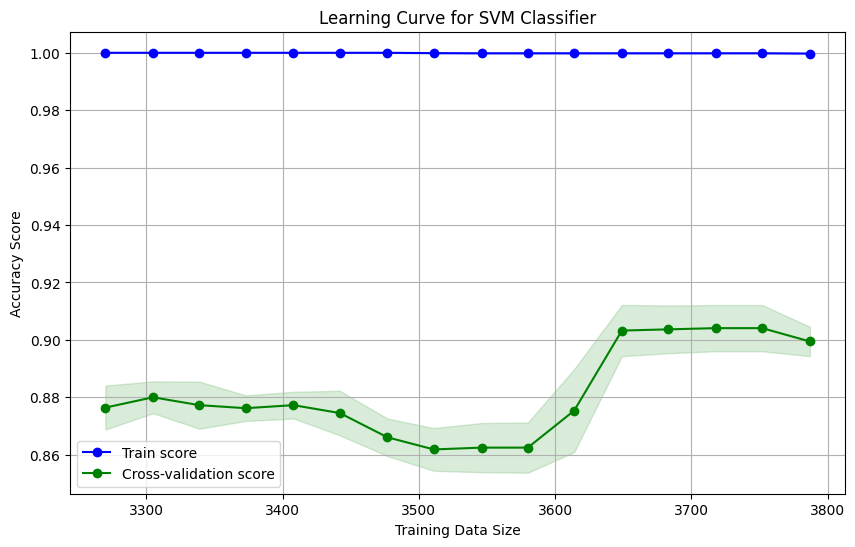

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve, KFold
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

all_parts_df

# Set up the CountVectorizer for k-mer splitting
k_mer_size = 5  # Set k-mer size
vectorizer = CountVectorizer(analyzer='char', ngram_range=(k_mer_size, k_mer_size))

# Set up the SVM classifier
svm_model = SVC(kernel='linear')

# Create a pipeline with the vectorizer and SVM
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', svm_model)
])

# Prepare training data
X, y = all_parts_df['DNA Sequence'], all_parts_df['Element']

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=pipeline,
    X=X,
    y=y,
    train_sizes=np.linspace(.1, 1, 100),
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1  # Use all processors
)

# Calculate mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.15)

plt.title('Learning Curve for SVM Classifier')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()
